In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import preprocessing

In [75]:
diabetes = pd.read_csv('/Users/mehdi/Downloads/diabetes.csv')

In [76]:
diabetes

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [77]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [78]:
diabetes.outcome.value_counts()

False    500
True     268
Name: outcome, dtype: int64

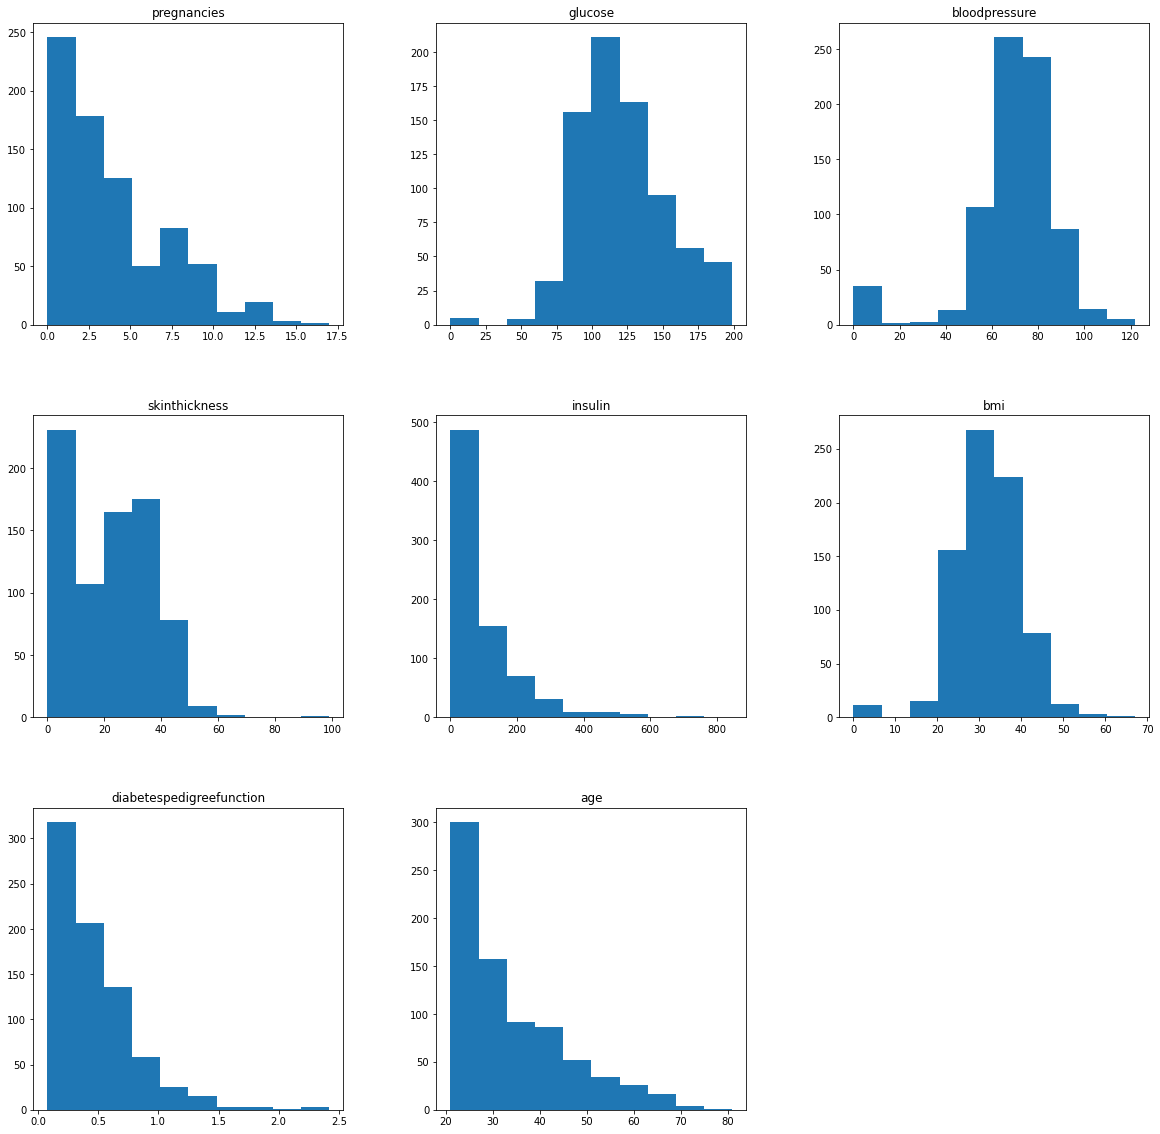

In [79]:
p = diabetes.hist(figsize = (20,20),grid=False)

/Users/mehdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='outcome', ylabel='count'>

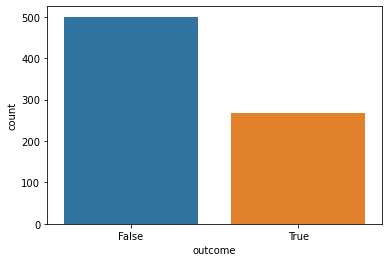

In [80]:
sns.countplot(diabetes['outcome'], label = 'count')

In [81]:
diabetes.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [82]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [83]:
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(diabetes.drop(["outcome"],axis = 1),), columns=['pregnancies', 
'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age'])

In [84]:
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [85]:
le = preprocessing.LabelEncoder()
diabetes['outcome']= le.fit_transform(diabetes['outcome'])
y = diabetes['outcome']
count = diabetes['outcome'].value_counts()
count

0    500
1    268
Name: outcome, dtype: int64

In [86]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [88]:
X_train.shape

(514, 8)

In [89]:
X_test.shape

(254, 8)

In [90]:
model = DecisionTreeClassifier()

In [91]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
model.score(X_train, y_train)

1.0

In [93]:
predictions = model.predict(X_test)

In [94]:
model.score(X_test, y_test)

0.6811023622047244

In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       163
           1       0.56      0.54      0.55        91

    accuracy                           0.68       254
   macro avg       0.65      0.65      0.65       254
weighted avg       0.68      0.68      0.68       254



In [96]:
print(confusion_matrix(y_test, predictions))

[[124  39]
 [ 42  49]]


In [97]:
diabetes.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

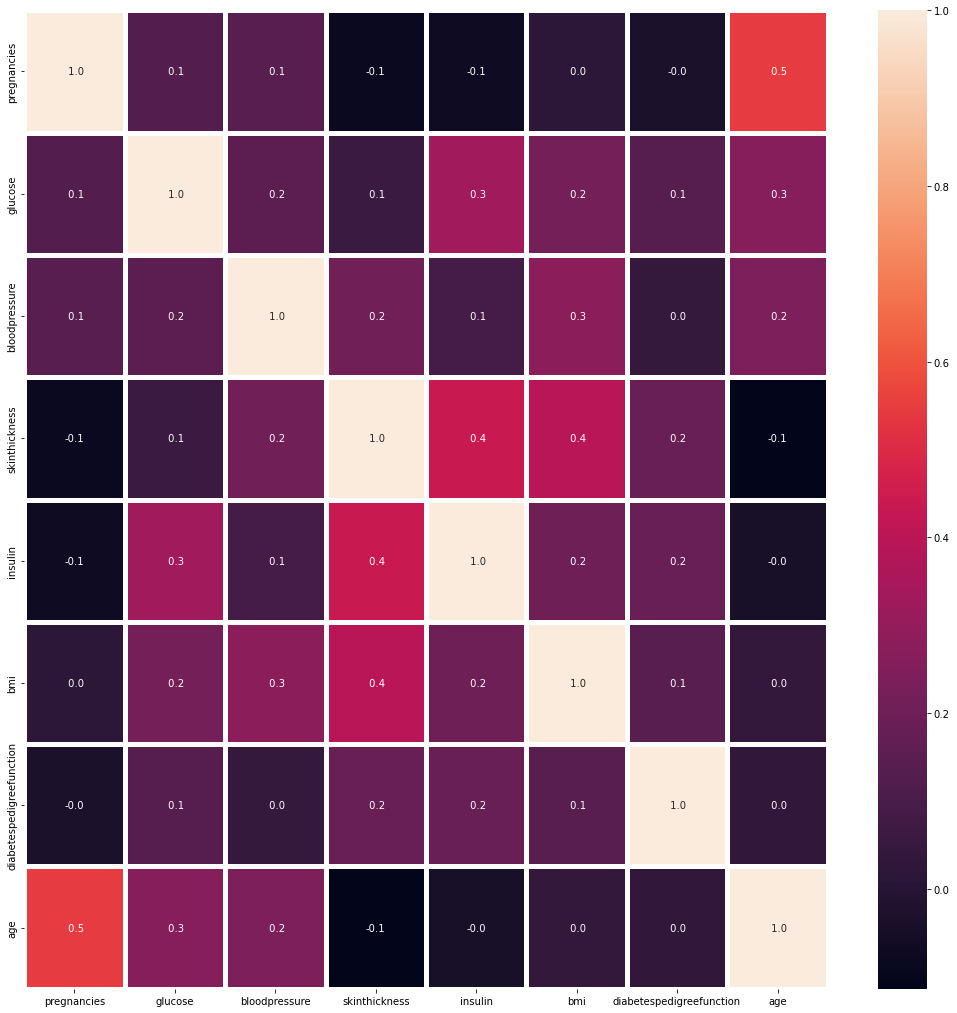

In [98]:
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(X.corr(), annot = True, linewidths = 5, fmt =' .1f', ax = ax)

[Text(1943.7615894039736, 3422.98125, 'glucose <= 0.207\ngini = 0.452\nsamples = 514\nvalue = [337, 177]\nclass = T'),
 Text(790.8079470198676, 3202.1437499999997, 'age <= -0.403\ngini = 0.293\nsamples = 325\nvalue = [267, 58]\nclass = T'),
 Text(295.6291390728477, 2981.3062499999996, 'pregnancies <= 1.085\ngini = 0.104\nsamples = 182\nvalue = [172, 10]\nclass = T'),
 Text(236.50331125827816, 2760.46875, 'bmi <= 2.171\ngini = 0.095\nsamples = 181\nvalue = [172, 9]\nclass = T'),
 Text(177.37748344370863, 2539.6312499999995, 'bmi <= -0.132\ngini = 0.085\nsamples = 180\nvalue = [172, 8]\nclass = T'),
 Text(118.25165562913908, 2318.79375, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]\nclass = T'),
 Text(236.50331125827816, 2318.79375, 'bloodpressure <= -0.936\ngini = 0.191\nsamples = 75\nvalue = [67, 8]\nclass = T'),
 Text(118.25165562913908, 2097.9562499999997, 'bmi <= 0.236\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = T'),
 Text(59.12582781456954, 1877.1187499999999, 'gini = 0.0\nsam

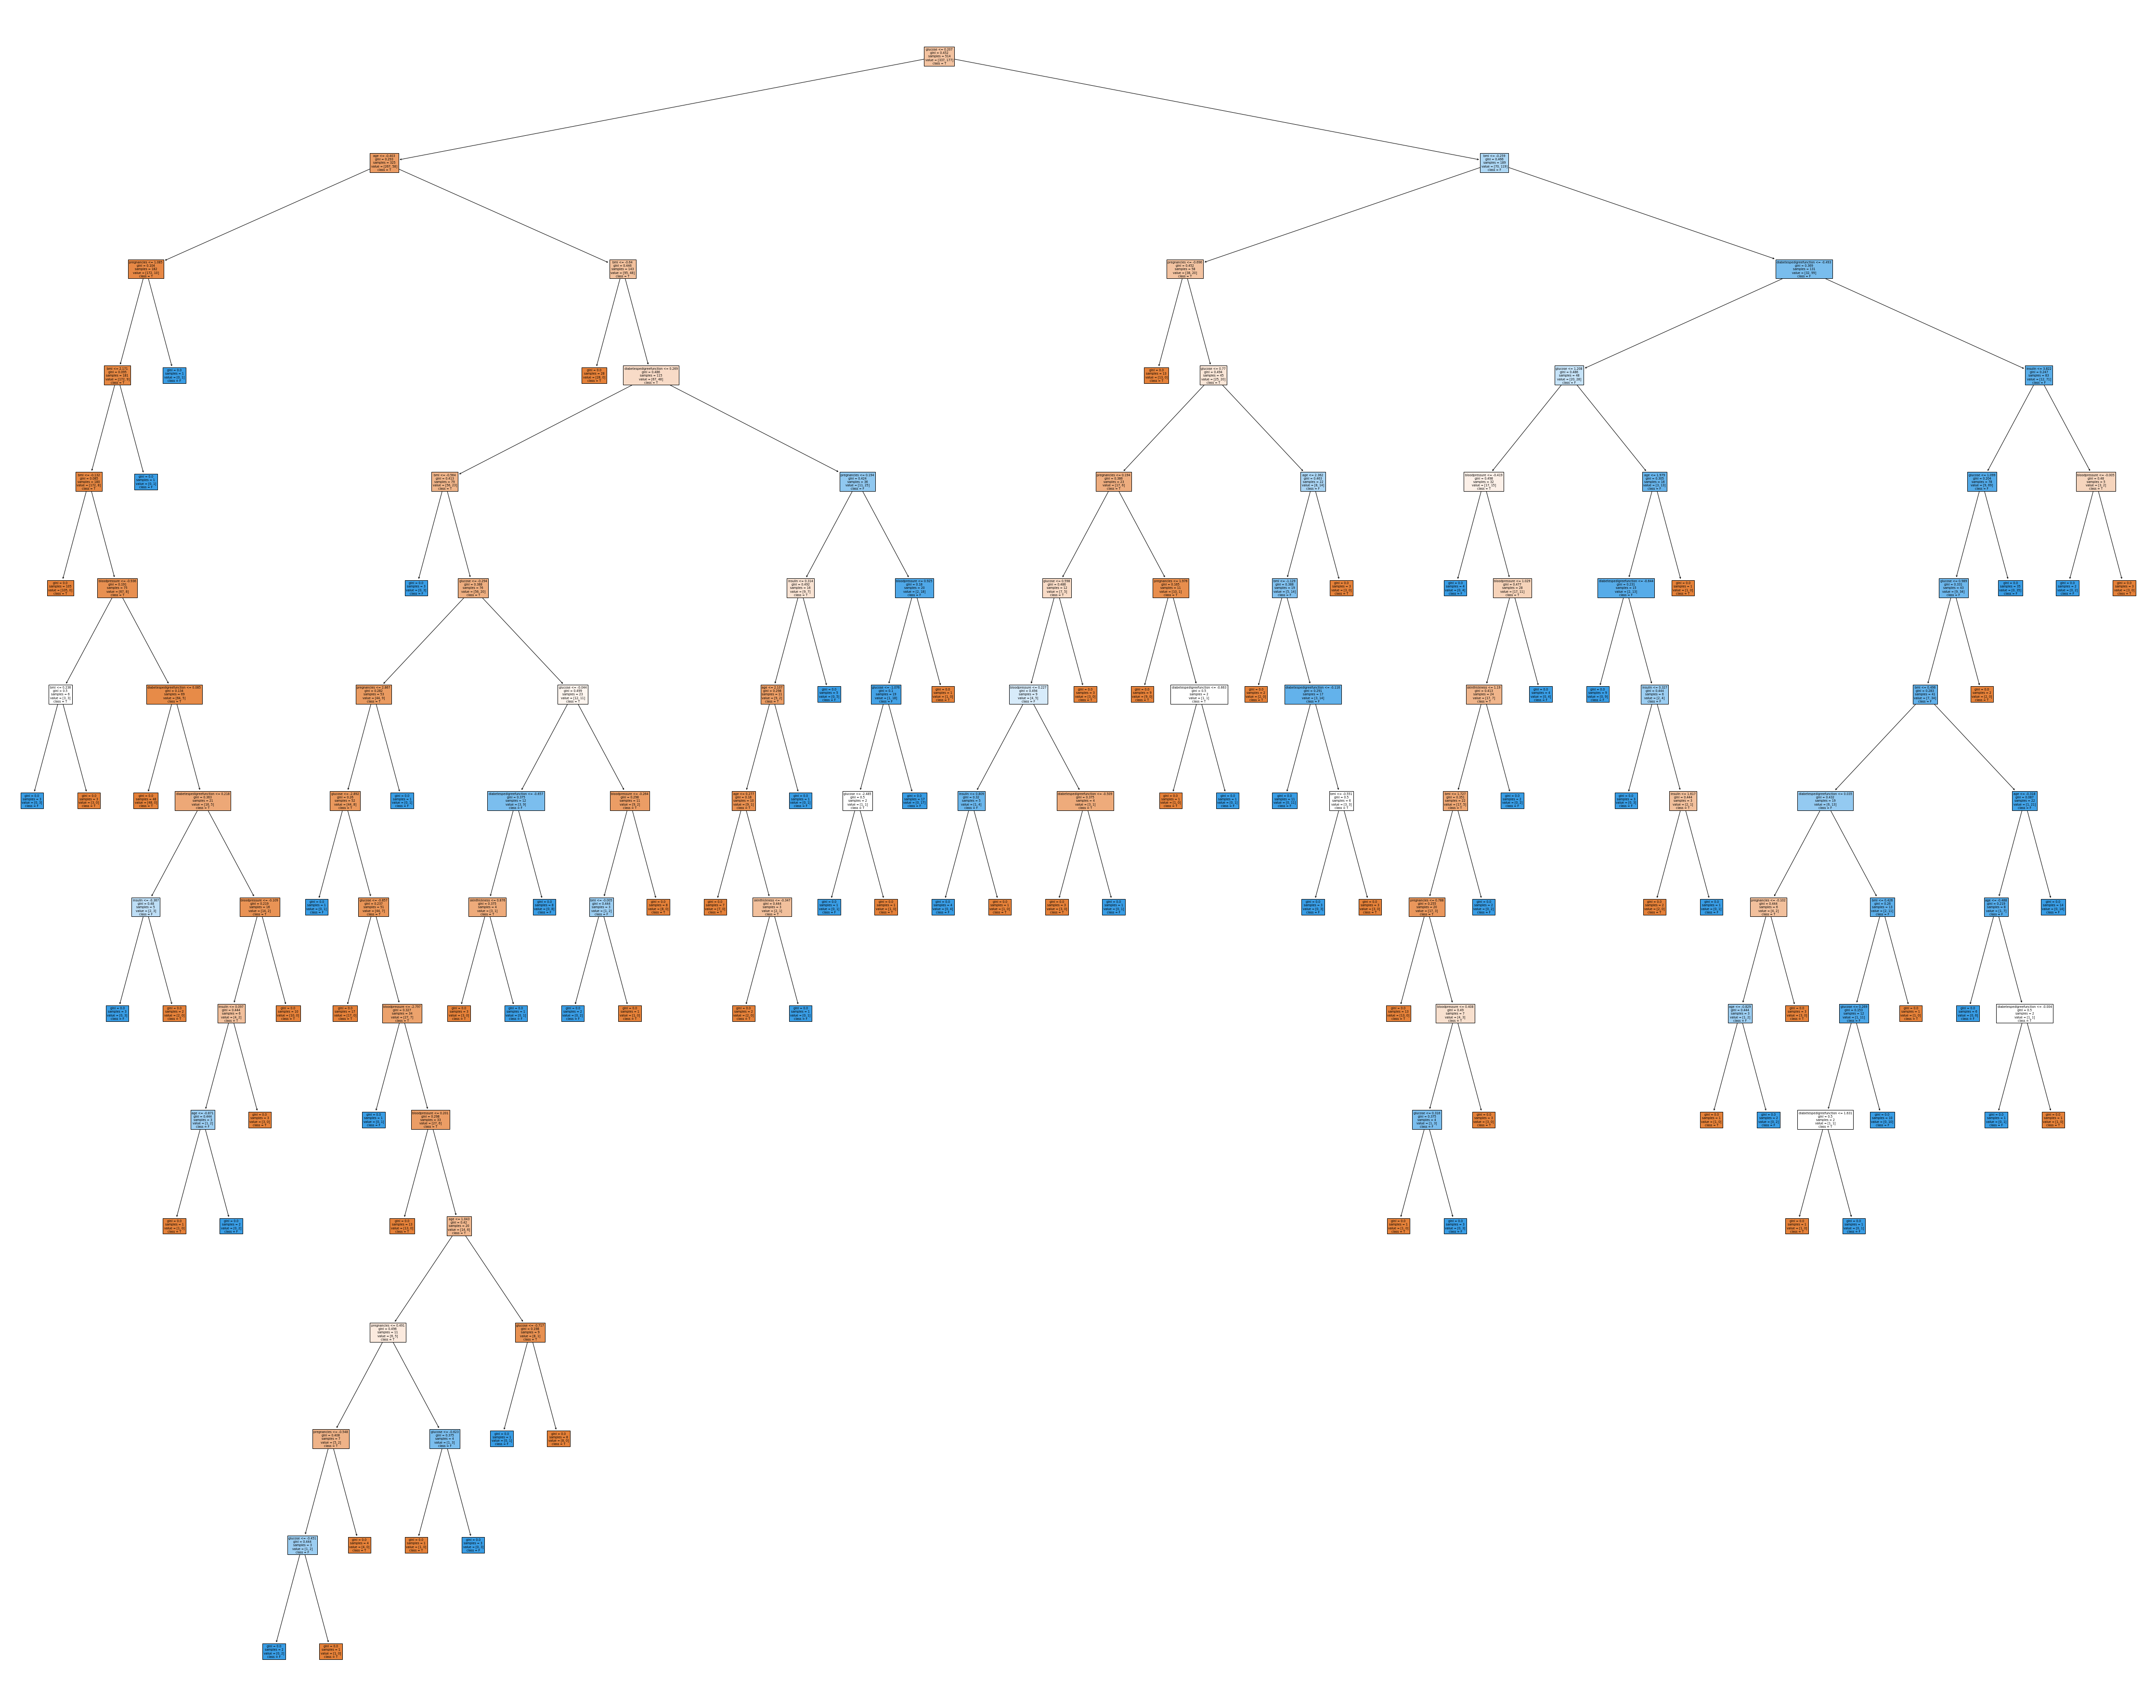

In [99]:
plt.figure(figsize = (80, 65))
plot_tree(model, feature_names = X.columns, class_names = ['T', 'F'], filled =True)

In [100]:
print(tree.export_text(model))

|--- feature_1 <= 0.21
|   |--- feature_7 <= -0.40
|   |   |--- feature_0 <= 1.09
|   |   |   |--- feature_5 <= 2.17
|   |   |   |   |--- feature_5 <= -0.13
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  -0.13
|   |   |   |   |   |--- feature_2 <= -0.94
|   |   |   |   |   |   |--- feature_5 <= 0.24
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  0.24
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -0.94
|   |   |   |   |   |   |--- feature_6 <= 0.08
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  0.08
|   |   |   |   |   |   |   |--- feature_6 <= 0.22
|   |   |   |   |   |   |   |   |--- feature_4 <= -0.37
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  -0.37
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  0.22
|   |   |   |   |   |   |   |   |--- feature_2 <= -0.

In [101]:
dataPrediction = pd.DataFrame({'diabetes_réel': y_test,
                                'diabetes_prédit': predictions})

In [102]:
dataPrediction

,diabetes_réel,diabetes_prédit
173,0,0
253,0,0
207,1,1
737,0,0
191,0,0
...,...,...
767,0,0
58,0,1
366,1,0
653,0,0


/Users/mehdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes_prédit', ylabel='count'>

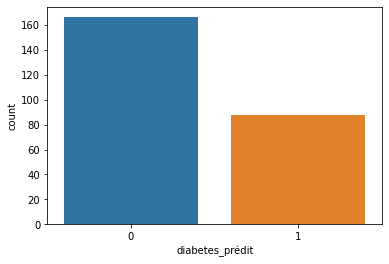

In [103]:
sns.countplot(dataPrediction['diabetes_prédit'], label = 'count')